# Overview 
## Data Fellowship Regression module - happiness estimation

In [2]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
#import data
dataset = pd.read_csv('HappinessAlcoholConsumption.csv')

In [6]:
dataset.head(6)

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97
5,Canada,North America,north,7.404,922,42.349,240,122,100


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 9 columns):
Country             122 non-null object
Region              122 non-null object
Hemisphere          122 non-null object
HappinessScore      122 non-null float64
HDI                 122 non-null int64
GDP_PerCapita       122 non-null float64
Beer_PerCapita      122 non-null int64
Spirit_PerCapita    122 non-null int64
Wine_PerCapita      122 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 8.7+ KB


## Explore and transform

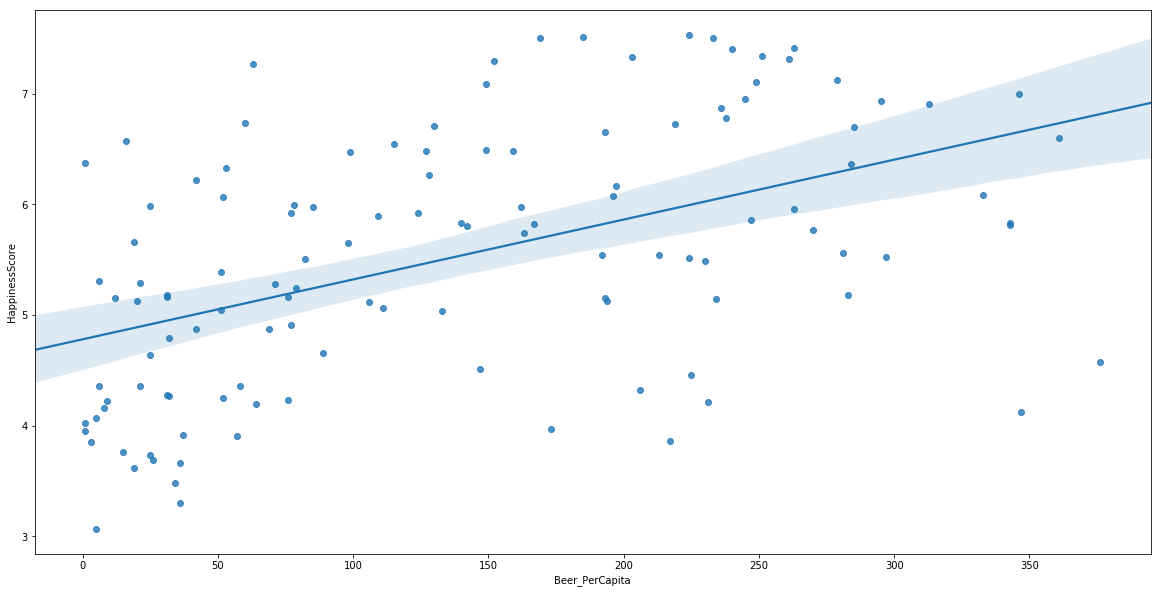

In [29]:
plt.figure(figsize = (20,10))

plot1 = sns.regplot(x='Beer_PerCapita', y='HappinessScore', data=dataset)

## Build model

In [21]:
dataset.corr()

,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
HappinessScore,1.000000,0.815163,-0.451425,0.493367,0.256399,0.450589
HDI,0.815163,1.000000,-0.573734,0.588394,0.393413,0.602561
GDP_PerCapita,-0.451425,-0.573734,1.000000,-0.369936,-0.260818,-0.200154
Beer_PerCapita,0.493367,0.588394,-0.369936,1.000000,0.364855,0.474274
Spirit_PerCapita,0.256399,0.393413,-0.260818,0.364855,1.000000,0.118718
Wine_PerCapita,0.450589,0.602561,-0.200154,0.474274,0.118718,1.000000


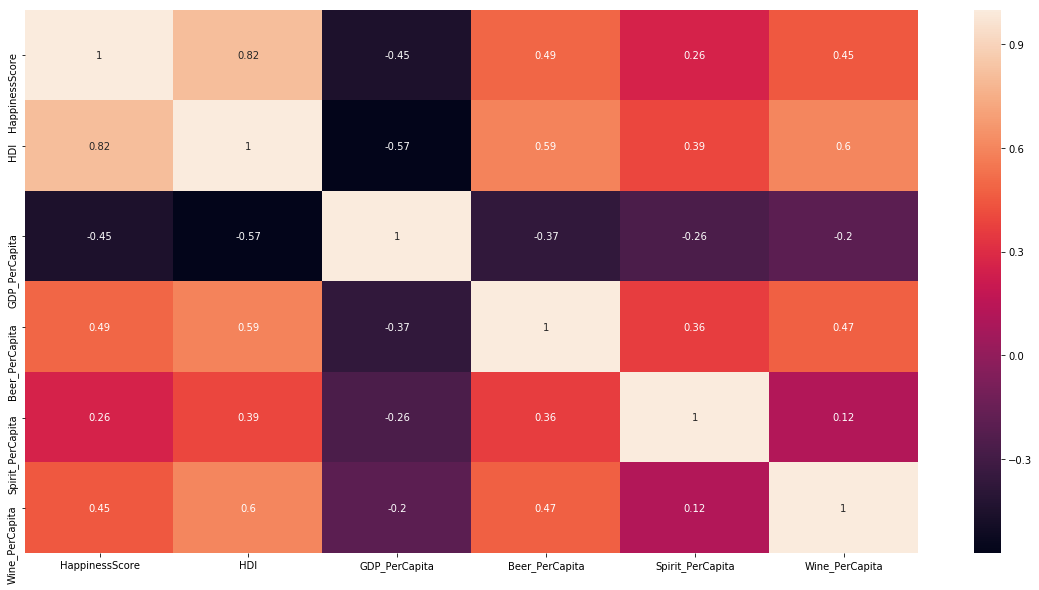

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(), annot = True)

In [24]:
X = dataset[['Beer_PerCapita']]
y = dataset [['HappinessScore']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [25]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(91, 1) (91, 1)
(31, 1) (31, 1)


## Visualising

In [30]:
Train = pd.concat([X_train, y_train], axis=1)
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 65 to 109
Data columns (total 2 columns):
Beer_PerCapita    91 non-null int64
HappinessScore    91 non-null float64
dtypes: float64(1), int64(1)
memory usage: 2.1 KB


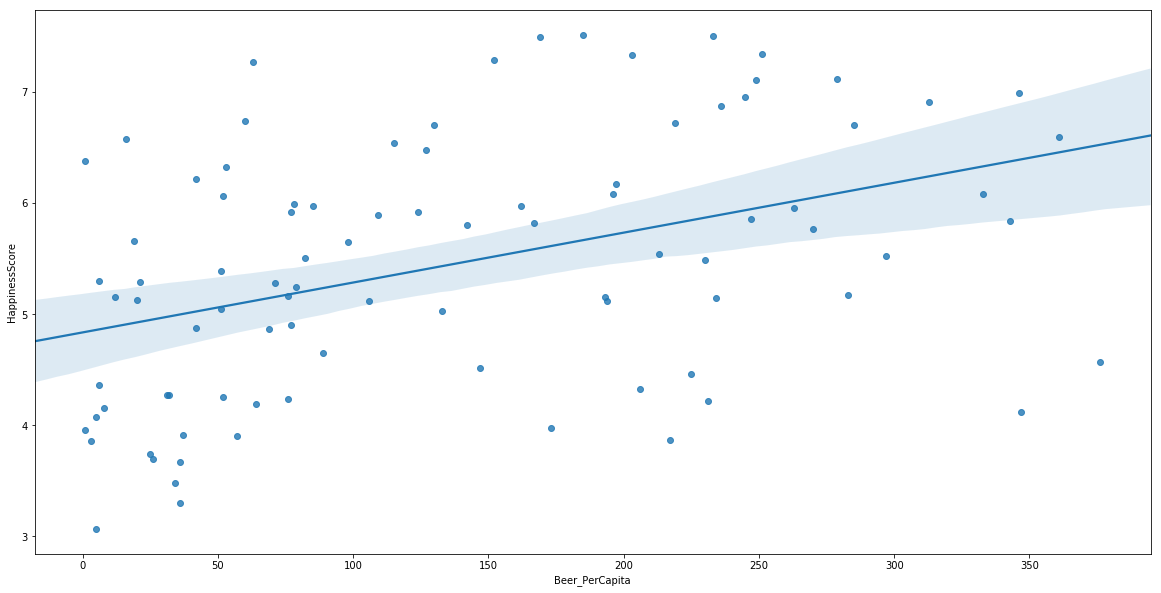

In [28]:
plt.figure(figsize = (20,10))
r = sns.regplot(x="Beer_PerCapita", y="HappinessScore", data=Train)

## Running a linear regression

In [32]:
# simplifying and putting a function into object
regression_model = linear_model.LinearRegression()

#running the function with data
regression_model = regression_model.fit(X_train, y_train)


In [38]:
# R2: 
r2 = regression_model.score(X_train, y_train)
print('the R2 is:', r2)

# Coefficient(s) Xn: 
Xn = regression_model.coef_
print('the coefficients: \n', Xn)

# Intercept: 
B0 = regression_model.intercept_
print('the intercept: \n', B0)

the R2 is: 0.17086397872744372
the coefficients: 
 [[0.00448793]]
the intercept: 
 [4.83636699]


## Evaluating the accuarcy of the model

In [39]:
# Using existing regression model to predict y on new (test) dataset. saving predicted y results in y_pred
y_pred = regression_model.predict(X_test)

# making y_pred into a dataframe
y_pred = pd.DataFrame(y_pred)

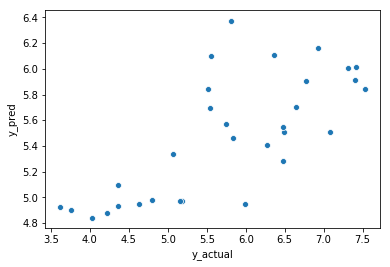

In [53]:
# reset test index from random selection (when split) into consequtive numbers (as are prediction index)
y_test = y_test['HappinessScore'].reset_index()

# concatenate actual results columns into new dataframe (axis =1)
y_obs_pred = pd.concat([y_test['HappinessScore'], y_pred], axis = 1)

# change the name of columns into y_test and y_pred
y_obs_pred.columns = ['y_actual', 'y_pred']

# add column difference between prediction and actual
y_obs_pred['diff'] = y_obs_pred['y_actual'] - y_obs_pred['y_pred']

# plot the chart

r = sns.scatterplot(x= 'y_actual', y= 'y_pred', data= y_obs_pred)